In [82]:
#Importing modules and libraries
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [83]:
#Reading the dataset as a panda dataframe
bikedata=pd.read_csv('201410-citibike-tripdata.csv')

In [84]:
#Calculating age from dataframe 
bikedata['age'] = 2014 - bikedata['birth year']

Null Hypotesis:

The proportion of Citibike riders aged above 40 years, is higher or equal to the proportion of riders aged less or equal to 40 years for a month with controlled climate variables. We selected the month of October because it presents the smaller amount of average rainfall per month a year.

$P_o$: *Proportion of riders above 40 years old.*

$P_1$: *Proportion of riders below 40 years old.*

$$H_0: P_0 - P_1 \geq 0 $$
$$H_1: P_0 - P_1 < 0 $$



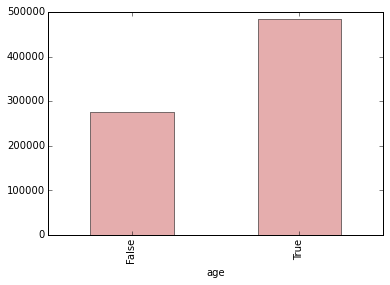

In [85]:
#Plotting age ranges
((bikedata['age'].groupby(bikedata['age']<= 40).count())).plot(kind="bar", color='IndianRed', alpha=0.5)

In [86]:
#Defining variable for agreggated age range 
AgeProp = bikedata['age'].groupby(bikedata['age']<= 40).count()

In [87]:
#Defining multiple variables for agreggated age ranges
N = AgeProp.sum()
ticks = AgeProp/AgeProp.sum()
p0 = ticks[1]
p1 = ticks[0]
print ticks
#print(AgeProp[1])
#print(AgeProp[0])

age
False    0.361541
True     0.638459
Name: age, dtype: float64


In [88]:
#Calculating proportions for each defined data range
#Calculating standard deviation
#Calculating Z-score
P0mP1=p0-p1
print("The estimated diference of proportions is: ") +str(P0mP1)

sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_age=sp_stdev(p0,N)

zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(p0,p1,sp_stdev_age)
print("The estimated z score is:") + str(z)

The estimated diference of proportions is: 0.276918580772
The estimated z score is:502.349792817


In [89]:
p_2y=1-0.9998
alpha = 0.05

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

report_result(p_2y,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected
